In [1]:
import pandas as pd
import geopandas as gpd
!pip install contextily -q
import contextily as cx
!pip install git+https://github.com/pmdscully/geo_northarrow.git -q
from geo_northarrow import add_north_arrow
import matplotlib.pyplot as plt
!pip install matplotlib-scalebar -q
from matplotlib_scalebar.scalebar import ScaleBar

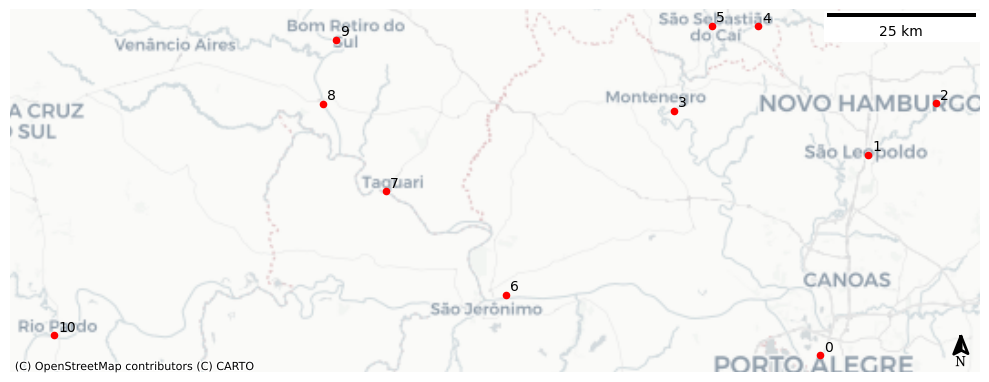

In [2]:
# Loading the stations dataset
df_est = pd.read_csv("plots\\stations.csv", decimal=",", encoding = "ISO-8859-1")

# Reorganizing as Geopandas.GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_est, geometry=gpd.points_from_xy(df_est.Longitude, df_est.Latitude), crs="EPSG:4326"
)
gdf = gdf.sort_index(ascending=False).reset_index(drop=True)
gdf_wm = gdf.to_crs(epsg=3857)

# Plotting the map
ax = gdf_wm.plot(figsize=(10, 4), color='red', markersize=20)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
add_north_arrow(ax, scale=.25, color='#000', text_scaler=4, text_yT=-2, xlim_pos=.98, ylim_pos=.05)
ax.add_artist(ScaleBar(1))
for x, y, label in zip(gdf_wm.geometry.x, gdf_wm.geometry.y, gdf_wm.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
ax.figure.tight_layout()

# Saving the plot
ax.figure.savefig('plots\\Fig3.png')